# Browse datasets on DANDI

This notebook will provide instructions to read a dataset from DANDI and browse
the corresponding NWB file. The full set of instructions on NWB can be found
[here](https://pynwb.readthedocs.io/en/stable/index.html). 

The following packages are necessary to run this notebook. Please install them
to your conda environment:

1. `pynwb`
2. `nwbwidgets`

The current version of this notebook requires you to download the dataset you
want to work with from DANDI archive to your local machine. 

In [1]:
import pandas as pd
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget
import numpy as np
import matplotlib.pyplot as plt

Please update the path below to point to the `.nwb` file on your local machine.

In [2]:
io = NWBHDF5IO("../../dandiset/sub-449141_ses-20190530T173316_behavior+ecephys+ogen.nwb", mode="r")
nwbfile = io.read()

The `nwbwidget` is a utility that allows you to browse the entire NWB file at a
glance. It is particularly useful for getting a high level understanding of the
contents of the dataset. 

In [3]:
nwb2widget(nwbfile)

Performing exploratory and downstream analyses requires extracting data from the
NWB file and bringing it into memory. Below, we extract behavior trials and
units from ephys into dataframes - `trials_df` and `units_df`, respectively.  

In [4]:
trials_df = nwbfile.trials.to_dataframe()
units_df = nwbfile.units.to_dataframe()

In [5]:
trials_df

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,early_lick,outcome,auto_water,free_water
id,,,,,,,,,,,,,,
0,0.0000,5.5544,1,N/A,N/A,N/A,1,audio delay,1,right,early,hit,0,0
1,11.8208,22.2921,2,N/A,N/A,N/A,2,audio delay,1,right,early,hit,0,0
2,24.0940,30.4805,3,N/A,N/A,N/A,3,audio delay,1,right,early,hit,0,0
3,33.1364,39.9460,4,N/A,N/A,N/A,4,audio delay,1,right,early,ignore,0,0
4,41.7374,46.7201,5,N/A,N/A,N/A,5,audio delay,1,right,no early,hit,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,4766.5699,4771.5319,656,N/A,N/A,N/A,656,audio delay,1,right,no early,hit,0,0
656,4773.9950,4778.8603,657,N/A,N/A,N/A,657,audio delay,1,right,no early,hit,0,0
657,4781.3120,4785.1642,658,N/A,N/A,N/A,658,audio delay,1,left,no early,miss,0,0


In [6]:
units_df

,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,drift_metric,...,velocity_above,velocity_below,classification,anno_name,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd
id,,,,,,,,,,,,,,,,,,,,,
0,0,30000,good,59.0,0.0,147.217681,8.037514,0.000000,0.413650,0.018182,...,0.686771,NaN,unlabelled,,"[19.228361858212644, 25.16561393995109, 28.914...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.5724660462776656, 2.1456866197183095, 1.966...",[nan]
1,1,30000,multi,11.0,20.0,86.126430,4.787742,0.000000,0.095506,0.000000,...,0.000000,0.000000,unlabelled,,"[8.136125511297582, 8.235526053858877, 14.2586...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[0.16850490196078433, 0.4238153594771242, 0.19...",[nan]
2,2,30000,good,43.0,20.0,64.746094,3.552861,0.002653,17.324200,0.154545,...,10.988300,-6.180940,unlabelled,,"[-0.3295540305365834, -0.19785331167015974, 0....","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[-2.0531439012096775, -1.9397366431451613, -1....",[nan]
3,3,30000,good,11.0,60.0,56.539984,2.954013,0.000000,0.285685,0.072727,...,-0.515078,0.480740,good,Anterior olfactory nucleus,"[16.85488223630304, 17.939621490504805, 18.021...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[0.7641921397379913, 0.56632096069869, 0.82901...",[nan]
4,4,30000,good,27.0,40.0,60.036058,3.331454,0.000000,0.005410,1.000000,...,-0.262633,-0.343385,unlabelled,,"[17.38181844582985, 441.68083391373926, 564.16...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[-0.18028846153846154, 0.3605769230769231, -0....",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,505,30000,good,59.0,1440.0,297.534180,6.342309,0.000000,0.099875,0.000000,...,0.000000,-0.343388,good,Midbrain reticular nucleus,"[15.20743573111292, 16.26698295628765, 16.4064...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[-4.755859375, -5.0830078125, -3.9892578125, -...",[nan]
2112,506,30000,good,59.0,1560.0,98.612035,2.571565,0.000000,0.019559,1.000000,...,24.037200,-1.373550,unlabelled,,"[8.793836569035015, 277.82287333129483, 354.28...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[5.759640957446808, 5.659906914893617, 6.65724...",[nan]
2113,507,30000,multi,59.0,1640.0,172.346166,4.056073,0.000000,0.121098,0.000000,...,8.928090,NaN,unlabelled,,"[1.2496709899752019, 33.18653497590302, 34.357...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[-2.009503865979381, -2.3477770618556697, -2.7...",[nan]


The units dataframe contains information such as `unit_quality`, `spike_times`,
and even the CCF location of the electrode for each unit. In the cell below, we'll write a
function that returns the x, y and z CCF coordinates for a given unit in the
`units_df`.

**Please Note:** x, y, and z are described in the pipeline as follows:

    ccf_x   :  int   # (um)  Left-to-Right (ML axis)
    ccf_y   :  int   # (um)  Superior-to-Inferior (DV axis)
    ccf_z   :  int   # (um)  Anterior-to-Posterior (AP axis)


In [7]:
def get_ccf(unit_number):
    x = float(units_df.electrodes[unit_number].reset_index().x.values)
    y = float(units_df.electrodes[unit_number].reset_index().y.values)
    z = float(units_df.electrodes[unit_number].reset_index().z.values)
    return x, y, z

In [8]:
x_ccf, y_ccf, z_ccf = get_ccf(unit_number=0)

print(f"x_ccf = {x_ccf}")
print(f"y_ccf = {y_ccf}")
print(f"z_ccf = {z_ccf}")

x_ccf = 6620.0
y_ccf = 4740.0
z_ccf = 2720.0


You can further filter the dataframes to suit your analysis goals. For example,
we will filter the `trials_df` to only show the entries that contain `photostim`
and where the outcome is a `hit`.
We will also filter the `units_df` to only show units with "good"
`classification` quality.

In [9]:
trials = trials_df.query("photostim_onset != 'N/A' and outcome == 'hit'")

In [10]:
units = units_df.query("classification == 'good'").reset_index()

In [11]:
units

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,velocity_above,velocity_below,classification,anno_name,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd
0,3,3,30000,good,11.0,60.0,56.539984,2.954013,0.000000,0.285685,...,-0.515078,0.480740,good,Anterior olfactory nucleus,"[16.85488223630304, 17.939621490504805, 18.021...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[0.7641921397379913, 0.56632096069869, 0.82901...",[nan]
1,8,8,30000,good,11.0,300.0,114.756332,5.388086,0.037909,3.299630,...,0.371609,0.426272,good,Anterior olfactory nucleus,"[-0.02451903222055085, 0.44261685089614433, 1....","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[-1.3679750504032258, -1.216765372983871, -1.1...",[nan]
2,9,9,30000,good,27.0,320.0,337.810382,13.569296,0.000000,1.196630,...,0.902027,0.000000,good,Anterior olfactory nucleus,"[-0.3466541238745928, -0.3245873367600467, 1.5...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[-5.366918665276329, -5.335147288842545, -5.42...",[nan]
3,10,10,30000,good,11.0,340.0,236.101562,8.838941,0.000000,0.249688,...,2.166600,-1.983600,good,Anterior olfactory nucleus,"[3.5245003395101864, 19.96236586465118, 24.589...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[-3.87109375, -3.41015625, -3.62890625, -4.511...",[nan]
4,13,13,30000,good,59.0,360.0,251.819987,12.015720,0.000000,0.554932,...,1.904400,-2.895710,good,Anterior olfactory nucleus,"[3.5243336719337925, 3.5277003569769483, 3.537...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[4.350042182227221, 4.002038807649043, 4.17076...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2091,485,30000,good,43.0,1860.0,126.615050,2.959896,0.000000,0.417601,...,0.000000,0.343388,good,Midbrain reticular nucleus,"[8.770836267475506, 49.82652010675252, 51.0380...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.079035874439462, 0.5745515695067265, -0.304...",[nan]
530,2095,489,30000,good,27.0,2400.0,163.973921,4.276903,0.069031,7.943780,...,0.970959,-1.013810,good,"Superior colliculus, motor related, intermedia...","[-0.46711818570510166, -0.13818053963374188, 0...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[-0.4069841675178754, -0.7229954034729316, -1....",[nan]
531,2108,502,30000,multi,11.0,3580.0,75.383828,4.470425,0.126795,3.250500,...,3.139550,-2.609750,good,"Retrosplenial area, ventral part, layer 1","[3.584401600887656, 3.585334946458187, 3.98587...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.6987909416581375, 2.5068769191402254, 2.516...",[nan]
532,2110,504,30000,good,11.0,3620.0,143.412537,7.007097,0.000000,0.421970,...,1.905650,-1.695770,good,"Retrosplenial area, ventral part, layer 1","[22.52149829326651, 37.43265731395145, 73.9456...","[[0.0, 5.5544], [11.8208, 22.2921], [24.094, 3...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.9138313609467454, 2.0005085059171597, 2.142...",[nan]


We can align spikes from good units to photostim onset and plot rasters to
explore how and whether there is evoked neural activity at `photostim_onset`. 

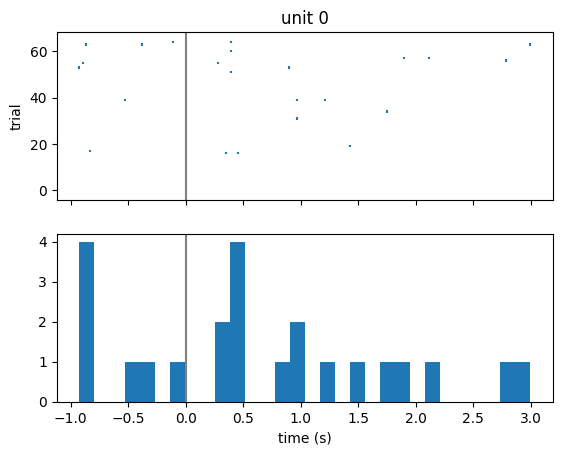

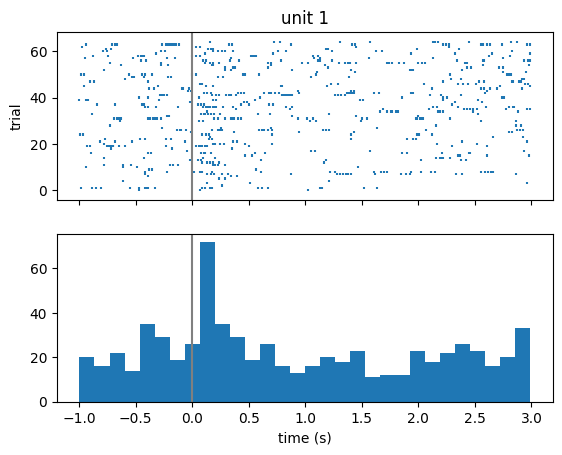

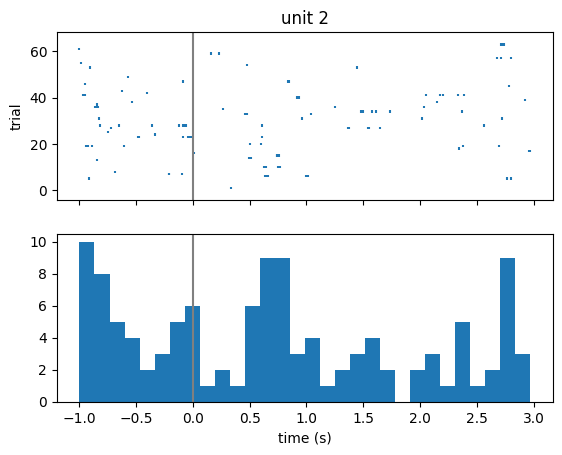

In [12]:
before = 1.0  # in seconds
after = 3.0

# Get the stimulus times for all stimuli
stim_on_times =trials["start_time"] + trials["photostim_onset"].values.astype("float")

for unit in range(3):
    unit_spike_times = units["spike_times"][unit]
    trial_spikes = []
    for time in stim_on_times:
        # Compute spike times relative to stimulus onset
        aligned_spikes = unit_spike_times - time
        # Keep only spike times in a given time window around the stimulus onset
        aligned_spikes = aligned_spikes[
            (-before < aligned_spikes) & (aligned_spikes < after)
        ]
        trial_spikes.append(aligned_spikes)
    fig, axs = plt.subplots(2, 1, sharex="all")
    plt.xlabel("time (s)")
    axs[0].eventplot(trial_spikes)

    axs[0].set_ylabel("trial")
    axs[0].set_title("unit {}".format(unit))
    axs[0].axvline(0, color=[0.5, 0.5, 0.5])

    axs[1].hist(np.hstack(trial_spikes), 30)
    axs[1].axvline(0, color=[0.5, 0.5, 0.5])

The NWB file also contains behavior tracking data which is found in `nwbfile.acquisition`.

In [13]:
nwbfile.acquisition

{'BehavioralEvents': BehavioralEvents pynwb.behavior.BehavioralEvents at 0x2030597411648
 Fields:
   time_series: {
     delay_start_times <class 'pynwb.base.TimeSeries'>,
     delay_stop_times <class 'pynwb.base.TimeSeries'>,
     go_start_times <class 'pynwb.base.TimeSeries'>,
     go_stop_times <class 'pynwb.base.TimeSeries'>,
     left_lick_times <class 'pynwb.base.TimeSeries'>,
     photostim_start_times <class 'pynwb.base.TimeSeries'>,
     photostim_stop_times <class 'pynwb.base.TimeSeries'>,
     presample_start_times <class 'pynwb.base.TimeSeries'>,
     presample_stop_times <class 'pynwb.base.TimeSeries'>,
     right_lick_times <class 'pynwb.base.TimeSeries'>,
     sample_start_times <class 'pynwb.base.TimeSeries'>,
     sample_stop_times <class 'pynwb.base.TimeSeries'>,
     trialend_start_times <class 'pynwb.base.TimeSeries'>,
     trialend_stop_times <class 'pynwb.base.TimeSeries'>
   },
 'BehavioralTimeSeries': BehavioralTimeSeries pynwb.behavior.BehavioralTimeSeries at 0

The cell below fetches the timestamps for jaw tracking for camera 0. 

In [14]:
camera0_jawTracking_ts = nwbfile.acquisition["BehavioralTimeSeries"]["Camera0_side_JawTracking"].timestamps[:]

Here, we can create a function to plot trialized jaw movement overlaid with
spiking activity from a particular unit

In [15]:
def plot_trialized_jaw_movement(unit, title='left lick trials', trial_offset=0, trial_limit=10, xlim=(-0.5, 1)):   
    tongue_likelihood = nwbfile.acquisition['BehavioralTimeSeries']['Camera0_side_TongueTracking'].data[:, -1]
    
    tracking_y = nwbfile.acquisition['BehavioralTimeSeries']['Camera0_side_JawTracking'].data[:, 0]
    tracking_ts = nwbfile.acquisition['BehavioralTimeSeries']['Camera0_side_JawTracking'].timestamps
    
    left_licks_trials = nwbfile.trials.to_dataframe().query("trial_instruction == 'left' and early_lick == 'no early' and outcome == 'hit'")
    right_licks_trials = nwbfile.trials.to_dataframe().query("trial_instruction == 'right' and early_lick == 'no early' and outcome == 'hit'")
    left_lick_times = nwbfile.acquisition['BehavioralEvents']['left_lick_times'].timestamps
    right_lick_times = nwbfile.acquisition['BehavioralEvents']['right_lick_times'].timestamps
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    h_spacing = 150
    
    unit_data = units_df.query(f'id == {unit}').iloc[0]
    
    for conditioned_trials_df, lick_times, ax, ax_name, spk_color in zip(
        (left_licks_trials, right_licks_trials),
        (left_lick_times, right_lick_times),
        axs, 
        ('left lick trials', 'right lick trials'),
        ('b', 'r')): 
        
        if trial_offset < 1 and isinstance(trial_offset, float):
            offset = int(len(conditioned_trials_df) * trial_offset)
        else:
            offset = trial_offset
        
        trial_numbers = conditioned_trials_df.trial[offset:offset+trial_limit].values

        _, row_ind, _ = np.intersect1d(trials_df.trial.values, trial_numbers, return_indices=True)

        for tr_id, row_id in enumerate(row_ind):
            trial_data = trials_df.iloc[row_id]
            align_time = lick_times[np.logical_and(lick_times >= trial_data.start_time, 
                                           lick_times < trial_data.stop_time)][0]

            trk_feat = tracking_y[np.logical_and(tracking_ts >= align_time + xlim[0], 
                                                           tracking_ts < align_time + xlim[-1])]
            tongue_out_bool = tongue_likelihood[np.logical_and(tracking_ts >= align_time + xlim[0], 
                                                           tracking_ts < align_time + xlim[-1])] > 0.9

            spike_times = unit_data.spike_times[np.logical_and(unit_data.spike_times >= align_time + xlim[0], 
                                                           unit_data.spike_times < align_time + xlim[-1])]
            spike_times -= align_time

            tvec = np.linspace(*xlim, len(trk_feat))

            # plot
            ax.plot(tvec, trk_feat + tr_id * h_spacing, '.k', markersize=1)
            ax.plot(tvec[tongue_out_bool], trk_feat[tongue_out_bool] + tr_id * h_spacing, '.', color='lime', markersize=2)
            ax.plot(spike_times, np.full_like(spike_times, trk_feat[tongue_out_bool].mean() + h_spacing/10) + tr_id * h_spacing,
                    '|', color=spk_color, markersize=4)


        ax.set_title(ax_name)
        ax.axvline(x=0, linestyle='--', color='k')

        # cosmetic
        ax.set_xlim(xlim)
        ax.set_yticks([])
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

C:\Users\kusha\AppData\Local\Temp\ipykernel_28820\3554794887.py:29: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  trial_numbers = conditioned_trials_df.trial[offset:offset+trial_limit].values


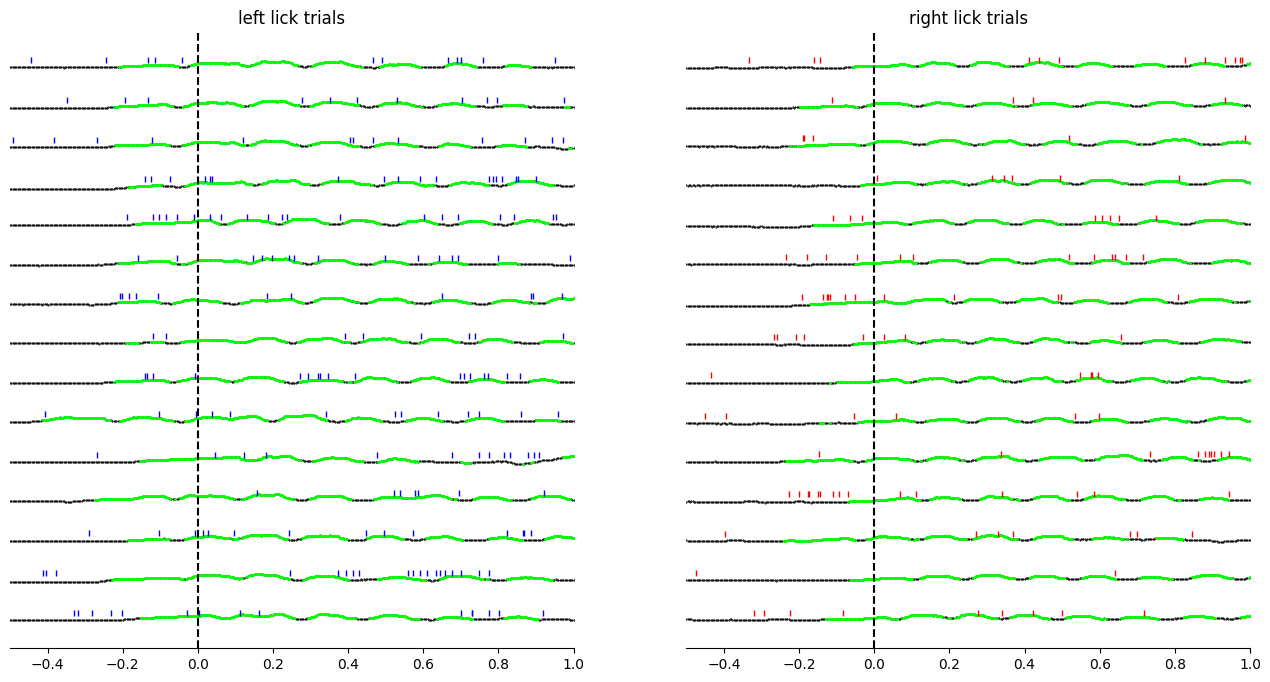

In [16]:
plot_trialized_jaw_movement(unit=12, trial_offset=0.5, trial_limit=15)